### Load in the data

In [66]:
## Imports 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#


In [4]:
compas_data = pd.read_csv('compas-scores-raw.csv')
compas_data_info = compas_data.info()
compas_data_head = compas_data.head()
compas_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60843 entries, 0 to 60842
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person_ID                60843 non-null  int64  
 1   AssessmentID             60843 non-null  int64  
 2   Case_ID                  60843 non-null  int64  
 3   Agency_Text              60843 non-null  object 
 4   LastName                 60843 non-null  object 
 5   FirstName                60843 non-null  object 
 6   MiddleName               15624 non-null  object 
 7   Sex_Code_Text            60843 non-null  object 
 8   Ethnic_Code_Text         60843 non-null  object 
 9   DateOfBirth              60843 non-null  object 
 10  ScaleSet_ID              60843 non-null  int64  
 11  ScaleSet                 60843 non-null  object 
 12  AssessmentReason         60843 non-null  object 
 13  Language                 60843 non-null  object 
 14  LegalStatus           

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60838,65667,79665,72038,Probation,West,James,NaN,Male,African-American,06/21/64,...,3,Medium with Override Consideration,8,Risk of Recidivism,0.16,8,High,New,1,0
60839,65667,79665,72038,Probation,West,James,NaN,Male,African-American,06/21/64,...,3,Medium with Override Consideration,18,Risk of Failure to Appear,35.00,10,High,New,1,0
60840,68603,79669,72042,PRETRIAL,Ryan,Michael,NaN,Male,Caucasian,02/06/85,...,1,Low,7,Risk of Violence,-2.75,2,Low,New,1,0
60841,68603,79669,72042,PRETRIAL,Ryan,Michael,NaN,Male,Caucasian,02/06/85,...,1,Low,8,Risk of Recidivism,-0.34,5,Medium,New,1,0


In [17]:
compas_data['DateOfBirth'] = pd.to_datetime(compas_data['DateOfBirth'], errors='coerce')
compas_data['Screening_Date'] = pd.to_datetime(compas_data['Screening_Date'], errors='coerce')
drop = ['Person_ID', 'AssessmentID', 'Case_ID', 'LastName', 'FirstName', 'MiddleName', 
                   'ScaleSet_ID', 'Scale_ID']
compas_data_cleaned = compas_data.drop(columns=drop)
compas_data_info_cleaned = compas_data_cleaned.info()
compas_data_head_cleaned = compas_data_cleaned.head()
print(compas_data_cleaned.isnull().sum())
compas_data_cleaned

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60843 entries, 0 to 60842
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Agency_Text              60843 non-null  object        
 1   Sex_Code_Text            60843 non-null  object        
 2   Ethnic_Code_Text         60843 non-null  object        
 3   DateOfBirth              60843 non-null  datetime64[ns]
 4   ScaleSet                 60843 non-null  object        
 5   AssessmentReason         60843 non-null  object        
 6   Language                 60843 non-null  object        
 7   LegalStatus              60843 non-null  object        
 8   CustodyStatus            60843 non-null  object        
 9   MaritalStatus            60843 non-null  object        
 10  Screening_Date           60843 non-null  datetime64[ns]
 11  RecSupervisionLevel      60843 non-null  int64         
 12  RecSupervisionLevelText  60843 n

,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,Screening_Date,RecSupervisionLevel,RecSupervisionLevelText,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,PRETRIAL,Male,Caucasian,1992-12-05,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,2013-01-01,1,Low,Risk of Violence,-2.08,4,Low,New,1,0
1,PRETRIAL,Male,Caucasian,1992-12-05,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,2013-01-01,1,Low,Risk of Recidivism,-1.06,2,Low,New,1,0
2,PRETRIAL,Male,Caucasian,1992-12-05,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,2013-01-01,1,Low,Risk of Failure to Appear,15.00,1,Low,New,1,0
3,PRETRIAL,Male,Caucasian,1984-09-16,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,2013-01-01,1,Low,Risk of Violence,-2.84,2,Low,New,1,0
4,PRETRIAL,Male,Caucasian,1984-09-16,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,2013-01-01,1,Low,Risk of Recidivism,-1.50,1,Low,New,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60838,Probation,Male,African-American,2064-06-21,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,2014-12-31,3,Medium with Override Consideration,Risk of Recidivism,0.16,8,High,New,1,0
60839,Probation,Male,African-American,2064-06-21,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,2014-12-31,3,Medium with Override Consideration,Risk of Failure to Appear,35.00,10,High,New,1,0
60840,PRETRIAL,Male,Caucasian,1985-02-06,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,2014-12-31,1,Low,Risk of Violence,-2.75,2,Low,New,1,0
60841,PRETRIAL,Male,Caucasian,1985-02-06,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,2014-12-31,1,Low,Risk of Recidivism,-0.34,5,Medium,New,1,0


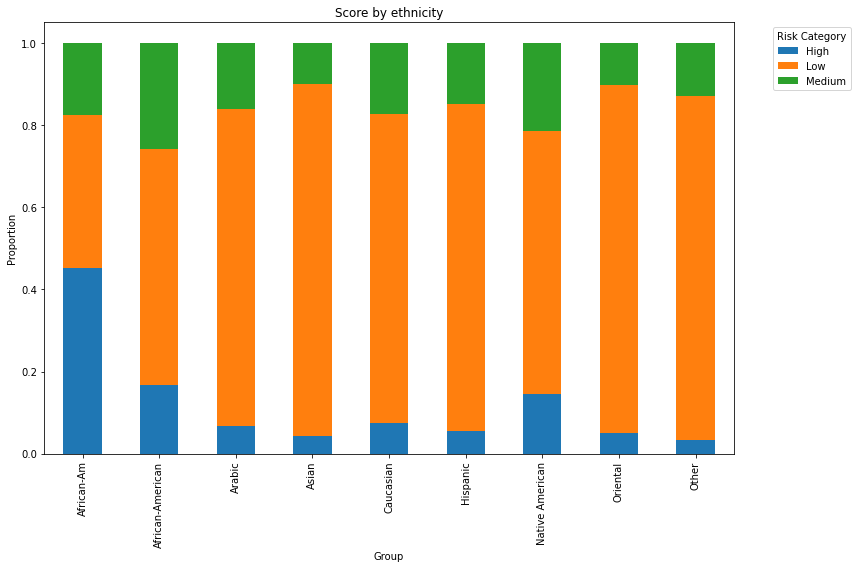

In [20]:
chart_data = compas_data_cleaned.groupby('Ethnic_Code_Text')['ScoreText'].value_counts(normalize=True).unstack()

chart_data.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Score by ethnicity')
plt.xlabel('Group')
plt.ylabel('Proportion')
plt.legend(title='Risk Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [74]:
# Dropping rows with missing values since all missing values are in target variable

compas_data_cleaned=compas_data_cleaned.dropna()
birthyear=compas_data_cleaned["DateOfBirth"].apply(lambda x:x.year)
dummycols1=['Sex_Code_Text','Ethnic_Code_Text',
           'Language','LegalStatus','CustodyStatus',
           'MaritalStatus','DisplayText']
compas_data_analysis1=pd.get_dummies(compas_data_cleaned,columns=dummycols1,drop_first=True)
compas_data_analysis1['BirthYear']=birthyear
score=np.where(compas_data_analysis1.ScoreText=='Low',0,
               np.where(compas_data_analysis1.ScoreText=='Medium',1,2))
compas_data_analysis1['Score']=score
compas_data_analysis1=compas_data_analysis1.drop(columns=['DateOfBirth','IsCompleted',
                                                          'IsDeleted','Screening_Date',
                                                          'AssessmentReason','Agency_Text',
                                                          'ScaleSet','RecSupervisionLevelText',
                                                          'DecileScore','ScoreText',
                                                          'AssessmentType','RecSupervisionLevel'])
compas_data_analysis1

,RawScore,Sex_Code_Text_Male,Ethnic_Code_Text_African-American,Ethnic_Code_Text_Arabic,Ethnic_Code_Text_Asian,Ethnic_Code_Text_Caucasian,Ethnic_Code_Text_Hispanic,Ethnic_Code_Text_Native American,Ethnic_Code_Text_Oriental,Ethnic_Code_Text_Other,...,MaritalStatus_Married,MaritalStatus_Separated,MaritalStatus_Significant Other,MaritalStatus_Single,MaritalStatus_Unknown,MaritalStatus_Widowed,DisplayText_Risk of Recidivism,DisplayText_Risk of Violence,BirthYear,Score
0,-2.08,True,False,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,True,1992,0
1,-1.06,True,False,False,False,True,False,False,False,False,...,False,False,False,True,False,False,True,False,1992,0
2,15.00,True,False,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,1992,0
3,-2.84,True,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,True,1984,0
4,-1.50,True,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,True,False,1984,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60838,0.16,True,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,2064,2
60839,35.00,True,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,2064,2
60840,-2.75,True,False,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,True,1985,0
60841,-0.34,True,False,False,False,True,False,False,False,False,...,False,False,False,True,False,False,True,False,1985,1


In [78]:
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Y=compas_data_analysis1.Score
# X=compas_data_analysis1.drop(columns=['Score'])
clf=RF(random_state=0)
kf=KFold(n_splits=10)

X_train, X_test, y_train, y_test=train_test_split(compas_data_analysis1,
                                                  compas_data_analysis1.Score,
                                                  test_size=0.33,
                                                  random_state=0)
clf.fit(X_train,y_train)
score=clf.score(X_test,y_test)
cvscore=cross_val_score(clf,X_test,y_test,cv=10)
score,cvscore

(1.0,
 array([1.       , 1.       , 1.       , 1.       , 1.       , 0.9995015,
        1.       , 1.       , 1.       , 1.       ]))